# Generating the graph for a single submission

This notebook contains code from the 'Phase1_Network_Graph.ipynb' notebook, but it considers only a single submission (A LARGER SUBMISSION WITH 136 COMMENTS) and generates the graphs.

# **the code is up to date**


---
Reading the data
---


.

In [ ]:
import torch
if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device('cpu')
print("Using {}.".format(device_name))

Using cpu.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
data_subreddit_t5_22i0 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_subreddit_t5_22i0.csv')
print(len(data_subreddit_t5_22i0)) #length of data =
print(len(pd.unique(data_subreddit_t5_22i0['subreddit_id']))) #number of subreddits considered =
print(len(pd.unique(data_subreddit_t5_22i0['id']))) #unique number of comments = , the data is at the comment level =
print(len(pd.unique(data_subreddit_t5_22i0['parent_id']))) #number of parent nodes =
print(len(pd.unique(data_subreddit_t5_22i0['link_id']))) #number of submissions =

6142
1
6142
3501
253


select the required comment from the subreddit

In [ ]:
data_submission_t3_5lcd9r = data_subreddit_t5_22i0[data_subreddit_t5_22i0['link_id'].isin(['t3_5lcd9r'])]
data_submission_t3_5lcd9r.to_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_submission_t3_5lcd9r.csv')

In [ ]:
data_submission_t3_5lcd9r = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/reddit_project/data_submission_t3_5lcd9r.csv')
print(len(data_submission_t3_5lcd9r)) #length of data =
print(len(pd.unique(data_submission_t3_5lcd9r['subreddit_id']))) #number of subreddits considered =
print(len(pd.unique(data_submission_t3_5lcd9r['id']))) #unique number of comments = , the data is at the comment level =
print(len(pd.unique(data_submission_t3_5lcd9r['parent_id']))) #number of parent nodes =
print(len(pd.unique(data_submission_t3_5lcd9r['link_id']))) #number of submissions =

136
1
136
82
1


In [ ]:
data_submission_t3_5lcd9r.head(3)

,Unnamed: 0.1,Unnamed: 0,edited,id,parent_id,distinguished,created_utc,author_flair_text,author_flair_css_class,controversiality,subreddit_id,retrieved_on,link_id,author,score,gilded,stickied,body,subreddit
0,3,454,1483229620,dbumo2p,t1_dbulyr6,NaN,1483228815,NaN,NaN,0,t5_22i0,1485679715,t3_5lcd9r,arteoncc,60,0,False,"Racial Profiling, erstmal paar Stunden festhal...",de
1,18,12372,0,dbumxdq,t1_dbumeql,NaN,1483229252,Farbenblindes Norwegen,NOOR,0,t5_22i0,1485679840,t3_5lcd9r,Pweuy,48,0,False,&gt;pol \n\n:-|,de
2,25,20260,0,dbun3j1,t1_dbumeql,NaN,1483229535,Er ist bisschen ein Otto geworden.,SHOL,0,t5_22i0,1485679921,t3_5lcd9r,SpaceHippoDE,10,0,False,germanon finally loses virginity,de


---
Generate Graph for 1 submission using Method 2a
---


.

In [ ]:
data_method2a = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','edgeweight_method2a'])
print(data_method2a)

Empty DataFrame
Columns: [subreddit_id, submission_id, from_user, to_user, edgeweight_method2a]
Index: []


In [ ]:
def method2a_function(subreddit_id, subreddit_data):
  data_method2a = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','edgeweight_method2a'])
  #print(data_method2a)

  #obtain the link_id's of all submission in the subreddit
  submissions_list = subreddit_data['link_id'].unique()
  #obtain the names of all user's in the subreddit
  #author_list = subreddit_data['author'].unique()
  #print(author_list[0])
  #print(author_list[1])

  print("Consider subreddit with ID: ",subreddit_id)
  print("total number of submission: ",len(submissions_list))
  counter = 0
  ignore_comments_counter = 0

  #iterate across all submissions
  for i in submissions_list:
    print('\n***********************')
    counter += 1
    curr_link_id = i
    print("consider submission with link_id = "+str(curr_link_id)+ " ("+str(counter)+"/"+str(len(submissions_list))+")")

    #obtain all comments made on this submission from the subreddit
    submission_comments = subreddit_data.loc[subreddit_data['link_id'] == curr_link_id]
    #print(submission_comments.head(3))

    #obtain the names of all user's in the subsmission
    author_list = submission_comments['author'].unique()
    print("total number of authors: ",len(author_list))

    #number of comments on the subreddit
    tot_comments = len(submission_comments)
    print("total number of comments in this submission = ", tot_comments)
    j = 0

    #iterate across the current submission
    for index, row in submission_comments.iterrows():
      j += 1
      #print('comment '+str(j)+" ---------------")

      curr_author = row['author']
      curr_parent_comment_id = row['parent_id'][3:] #noticed that the parent id is nothing but the comment id preceded by 3 characters
      #print(curr_parent_comment_id)

      #identify if a comment is a primary comment
      primary_comment_flag = 0
      if row['parent_id'] == row['link_id']: #it is a primary comment
        #print("primary comment")
        primary_comment_flag = 1

      #rule out any comment that does not have a valid parent in the submission
      #(the parent id of a given comment should be either (i) the link id itslef for a primary comment
      # or
      # the id of another comment in the submission)
      if(len(submission_comments[submission_comments['id'] == curr_parent_comment_id]['author']) == 0): #the parent comment could not be found
        #print(primary_comment_flag)
        #if (primary_comment_flag == 1):
          #print('this comment is a reply to the submission and hence will not have an edge')
        #else:
          #print('this comment was made as a reply to another comment which cannot be found in the data')
        #print('there')
        ignore_comments_counter += 1
        continue

      primary_comment_flag = 0
      #print('Found a valid parent comment in the submission')
      curr_parent = submission_comments[submission_comments['id'] == curr_parent_comment_id]['author'].values[0]
      #print('The parent comment was made by author: '+str(curr_parent))
      curr_comment_id = row['id']

      all_replies_to_parent_df = submission_comments[(submission_comments["parent_id"] == row['parent_id'])]
      if len(all_replies_to_parent_df) == 0:
        #print('reached here 1')
        ignore_comments_counter += 1
        continue
      curr_author_all_replies_to_parent_df = all_replies_to_parent_df[(all_replies_to_parent_df["author"] == curr_author)]
      if len(curr_author_all_replies_to_parent_df) == 0:
        #print('reached here 2')
        ignore_comments_counter += 1
        continue
      else:
        #print("edge weight for this comment: "+str(len(curr_author_all_replies_to_parent_df))+"/"+str(len(all_replies_to_parent_df)))
        #weighted_interaction_between_curr_and_curr_parent = float("{:.2f}".format((len(curr_author_all_replies_to_parent_df)/len(all_replies_to_parent_df))))
        weighted_interaction_between_curr_and_curr_parent = ((len(curr_author_all_replies_to_parent_df)/len(all_replies_to_parent_df)))
        #add the row to the dataframe
        if len(data_method2a[(data_method2a['from_user'] == curr_author)&(data_method2a['to_user'] == curr_parent)&(data_method2a['submission_id'] == curr_link_id)].values) > 0: #there exists a row with the curr_aithor to curr_parent in the same submission already
          #print('here')
          ignore_comments_counter += 1
          continue
        else:
          data_method2a.loc[len(data_method2a.index)] = [subreddit_id, curr_link_id, curr_author, curr_parent, weighted_interaction_between_curr_and_curr_parent]
          #print('length of submission data frame: '+str(len(data_method2a)))

    #data_method2a.append(data_method2a_local,ignore_index=True)
    #print(data_method2a_local)
    #print('appended, new length of data frame: '+str(len(data_method2a)))
  print('total number of comments ignored: ' +str(ignore_comments_counter))
  return data_method2a

data_method2a = method2a_function('t3_5lcd9r',data_submission_t3_5lcd9r)


Consider subreddit with ID:  t3_5lcd9r
total number of submission:  1

***********************
consider submission with link_id = t3_5lcd9r (1/1)
total number of authors:  68
total number of comments in this submission =  136
total number of comments ignored: 34


In [ ]:
print(len(data_method2a))
print(data_method2a.head(30))

102
   subreddit_id submission_id            from_user              to_user  \
0     t3_5lcd9r     t3_5lcd9r   PM_ME_YOUR_TENDIES         SpaceHippoDE   
1     t3_5lcd9r     t3_5lcd9r         omfgwallhax2             arteoncc   
2     t3_5lcd9r     t3_5lcd9r  TweetsInCommentsBot         omfgwallhax2   
3     t3_5lcd9r     t3_5lcd9r      pointlessly_mad             arteoncc   
4     t3_5lcd9r     t3_5lcd9r         omfgwallhax2           Rievkooche   
5     t3_5lcd9r     t3_5lcd9r       DankRevolution         omfgwallhax2   
6     t3_5lcd9r     t3_5lcd9r           Rievkooche       DankRevolution   
7     t3_5lcd9r     t3_5lcd9r              Petryot         omfgwallhax2   
8     t3_5lcd9r     t3_5lcd9r           Rievkooche              Petryot   
9     t3_5lcd9r     t3_5lcd9r            Kotbomber           Rievkooche   
10    t3_5lcd9r     t3_5lcd9r           Rievkooche            Kotbomber   
11    t3_5lcd9r     t3_5lcd9r           quiteamess      pointlessly_mad   
12    t3_5lcd9r     t

In [ ]:
data_method2a_final = pd.DataFrame(columns=['from_user','to_user','edgeweight_method2a'])
print(data_method2a_final)

Empty DataFrame
Columns: [from_user, to_user, edgeweight_method2a]
Index: []


In [ ]:
data_method2a_final = data_method2a.groupby(['from_user', 'to_user'], as_index=False)['edgeweight_method2a'].mean()

In [ ]:
print(len(data_method2a_final))
print(data_method2a_final.columns)
print(data_method2a_final.head(102))

102
Index(['from_user', 'to_user', 'edgeweight_method2a'], dtype='object')
             from_user             to_user  edgeweight_method2a
0    6A-F9-A1-CC-29-C0          Doldenberg             0.250000
1    6A-F9-A1-CC-29-C0            arteoncc             0.333333
2    6A-F9-A1-CC-29-C0      panopticon1212             1.000000
3             Alixundr          Doldenberg             0.500000
4          Amadeus_IOM          Doldenberg             0.250000
..                 ...                 ...                  ...
97        spaetzuender             Kharaaz             1.000000
98        spaetzuender           escalat0r             0.500000
99           the-knife   the_cereal_killer             1.000000
100  the_cereal_killer          Doldenberg             0.250000
101           vinokess  MindlessVegetation             0.250000

[102 rows x 3 columns]


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G_method2a = nx.from_pandas_edgelist(data_method2a_final, "from_user", "to_user", edge_attr="edgeweight_method2a", create_using=nx.DiGraph()) #weight for graph not set

attempt at graph can delete

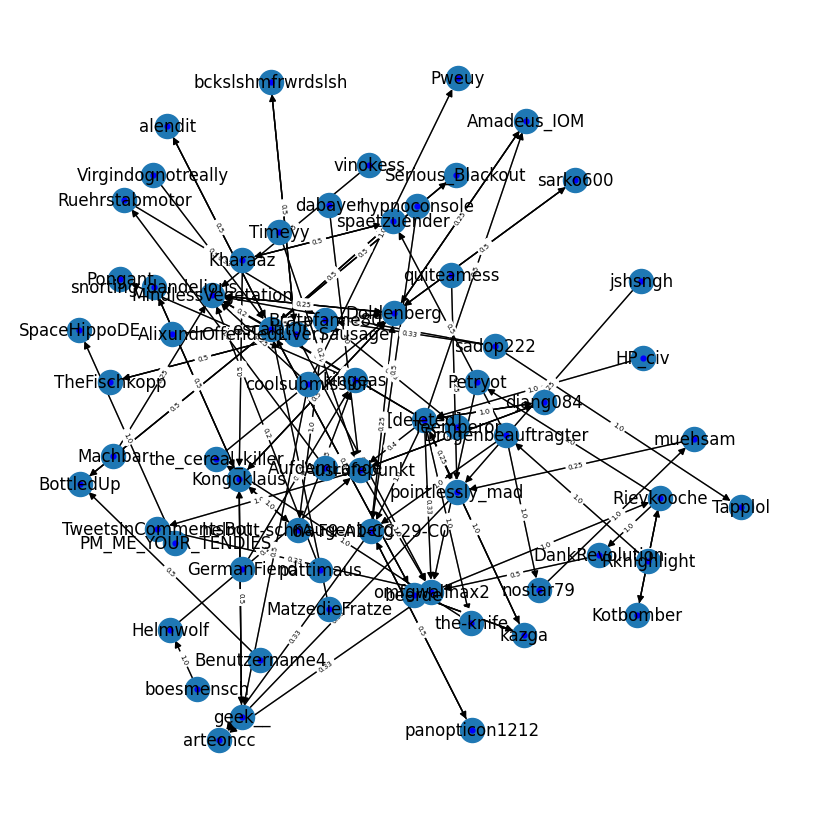

In [ ]:
from matplotlib.pyplot import text
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_method2a, k=0.61)  # For better example looking
d = dict(G_method2a.degree)
labels = {e: G_method2a.edges[e]['edgeweight_method2a'] for e in G_method2a.edges}
nx.draw(G_method2a, pos,with_labels=True)
nx.draw_networkx_edges(G_method2a, pos, alpha=0.4)
nx.draw_networkx_nodes(G_method2a, pos, node_size=12, node_color="b")
nx.draw_networkx_edge_labels(G_method2a, pos, edge_labels=labels, font_size = 5)
#nx.draw_networkx_labels(G_method2a, pos, labels=labels, font_size = 5)

plt.show()

In [ ]:
print(G_method2a.number_of_nodes())
print(G_method2a.number_of_edges()) #edges same as number of rows
print(np.mean([d for _, d in G_method2a.degree()])) #average degree of nodes
print(G_method2a.size(weight='edgeweight_method2a'))

66
102
3.090909090909091
64.72


In [ ]:
pip install node2vec

In [ ]:
from node2vec import Node2Vec as n2v

In [ ]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(G_method2a,dimensions=128)

mdl2 = g_emb.fit(
    vector_size = 128,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 160.46it/s]


In [ ]:
comment_id = 'SpaceHippoDE'
for s in mdl2.wv.most_similar(comment_id, topn = 10):
    print(s)

('Ruehrstabmotor', 0.9966720342636108)
('Drogenbeauftragter', 0.9964685440063477)
('nostar79', 0.9964585900306702)
('boesmensch', 0.9962162971496582)
('HP_civ', 0.9961258172988892)
('Rkhighlight', 0.9961234927177429)
('the-knife', 0.9959908127784729)
('AufdemLande', 0.9956763386726379)
('Teemperor', 0.9954769015312195)
('hypnoconsole', 0.9953565001487732)


---
Generate Graph for 1 submission using Method 2b
---


.

In [ ]:
data_method2b = pd.DataFrame(columns=['subreddit_id','submission_id','from_user','to_user','num', 'denom'])
print(data_method2b)

Empty DataFrame
Columns: [subreddit_id, submission_id, from_user, to_user, num, denom]
Index: []


In [ ]:
def method2b_function(subreddit_id, subreddit_data):
  submissions_list = subreddit_data['link_id'].unique()

  print("Consider subreddit with ID: ",subreddit_id)
  print("total number of submission: ",len(submissions_list))
  counter = 0
  ignore_comments_counter = 0

  #number of comments on the subreddit
  tot_comments = len(subreddit_data)
  print("total number of comments in this submission = ", tot_comments)

  #iterate across the current submission
  for index, row in subreddit_data.iterrows():
      curr_link_id = row['link_id']
      curr_author = row['author']
      curr_parent_comment_id = row['parent_id'][3:] #noticed that the parent id is nothing but the comment id preceded by 3 characters

      if(len(subreddit_data[subreddit_data['id'] == curr_parent_comment_id]['author']) == 0): #the parent comment could not be found
        ignore_comments_counter += 1
        continue

      #print('Found a valid parent comment in the submission')
      curr_parent = subreddit_data[subreddit_data['id'] == curr_parent_comment_id]['author'].values[0]

      all_replies_to_parent_df = subreddit_data[(subreddit_data["parent_id"] == row['parent_id'])]
      if len(all_replies_to_parent_df) == 0:
        ignore_comments_counter += 1
        continue
      curr_author_all_replies_to_parent_df = all_replies_to_parent_df[(all_replies_to_parent_df["author"] == curr_author)]
      if len(curr_author_all_replies_to_parent_df) == 0:
        ignore_comments_counter += 1
        continue
      else:
        if len(data_method2b[(data_method2b['from_user'] == curr_author)&(data_method2b['to_user'] == curr_parent)].values) > 0: #there exists a row with the curr_author to curr_parent in the same submission already
          ignore_comments_counter += 1
          continue
        else:
          data_method2b.loc[len(data_method2b.index)] = [subreddit_id, curr_link_id, curr_author, curr_parent,len(curr_author_all_replies_to_parent_df), len(all_replies_to_parent_df) ]

  print('total number of comments ignored: ' +str(ignore_comments_counter))
  return data_method2b

data_method2b = method2b_function('t3_5lcd9r',data_submission_t3_5lcd9r)


Consider subreddit with ID:  t3_5lcd9r
total number of submission:  1
total number of comments in this submission =  136
total number of comments ignored: 34


In [ ]:
print(len(data_method2b))
print(data_method2b)

102
    subreddit_id submission_id             from_user            to_user  num  \
0      t3_5lcd9r     t3_5lcd9r    PM_ME_YOUR_TENDIES       SpaceHippoDE    1   
1      t3_5lcd9r     t3_5lcd9r          omfgwallhax2           arteoncc    1   
2      t3_5lcd9r     t3_5lcd9r   TweetsInCommentsBot       omfgwallhax2    1   
3      t3_5lcd9r     t3_5lcd9r       pointlessly_mad           arteoncc    1   
4      t3_5lcd9r     t3_5lcd9r          omfgwallhax2         Rievkooche    1   
..           ...           ...                   ...                ...  ...   
97     t3_5lcd9r     t3_5lcd9r             [deleted]              kazga    1   
98     t3_5lcd9r     t3_5lcd9r  OffendedLiverSausage  bckslshmfrwrdslsh    1   
99     t3_5lcd9r     t3_5lcd9r  OffendedLiverSausage       TheFischkopp    1   
100    t3_5lcd9r     t3_5lcd9r           AufdemLande     Ruehrstabmotor    1   
101    t3_5lcd9r     t3_5lcd9r                Timeyy       Ausrufepunkt    1   

     denom  
0        1  
1        

In [ ]:
data_method2b_final = pd.DataFrame(columns=['from_user','to_user','num','denom'])
print(data_method2b_final)

Empty DataFrame
Columns: [from_user, to_user, num, denom]
Index: []


In [ ]:
data_method2b_final = data_method2b.groupby(['from_user', 'to_user'], as_index=False).agg({'num':'sum','denom':'sum'})

In [ ]:
print(len(data_method2b_final))
print(data_method2b_final.columns)
print(data_method2b_final.head(140))

102
Index(['from_user', 'to_user', 'num', 'denom'], dtype='object')
             from_user             to_user  num  denom
0    6A-F9-A1-CC-29-C0          Doldenberg    1      4
1    6A-F9-A1-CC-29-C0            arteoncc    1      3
2    6A-F9-A1-CC-29-C0      panopticon1212    1      1
3             Alixundr          Doldenberg    1      2
4          Amadeus_IOM          Doldenberg    1      4
..                 ...                 ...  ...    ...
97        spaetzuender             Kharaaz    1      1
98        spaetzuender           escalat0r    1      2
99           the-knife   the_cereal_killer    1      1
100  the_cereal_killer          Doldenberg    1      4
101           vinokess  MindlessVegetation    1      4

[102 rows x 4 columns]


In [ ]:
data_method2b_final['edgeweight_method2b'] = data_method2b_final['num']/data_method2b_final['denom']

In [ ]:
data_method2b_final.head()

,from_user,to_user,num,denom,edgeweight_method2b
0,6A-F9-A1-CC-29-C0,Doldenberg,1,4,0.250000
1,6A-F9-A1-CC-29-C0,arteoncc,1,3,0.333333
2,6A-F9-A1-CC-29-C0,panopticon1212,1,1,1.000000
3,Alixundr,Doldenberg,1,2,0.500000
4,Amadeus_IOM,Doldenberg,1,4,0.250000


In [ ]:
G_method2b = nx.from_pandas_edgelist(data_method2b_final, "from_user", "to_user", edge_attr="edgeweight_method2b", create_using=nx.DiGraph()) #weight for graph not set

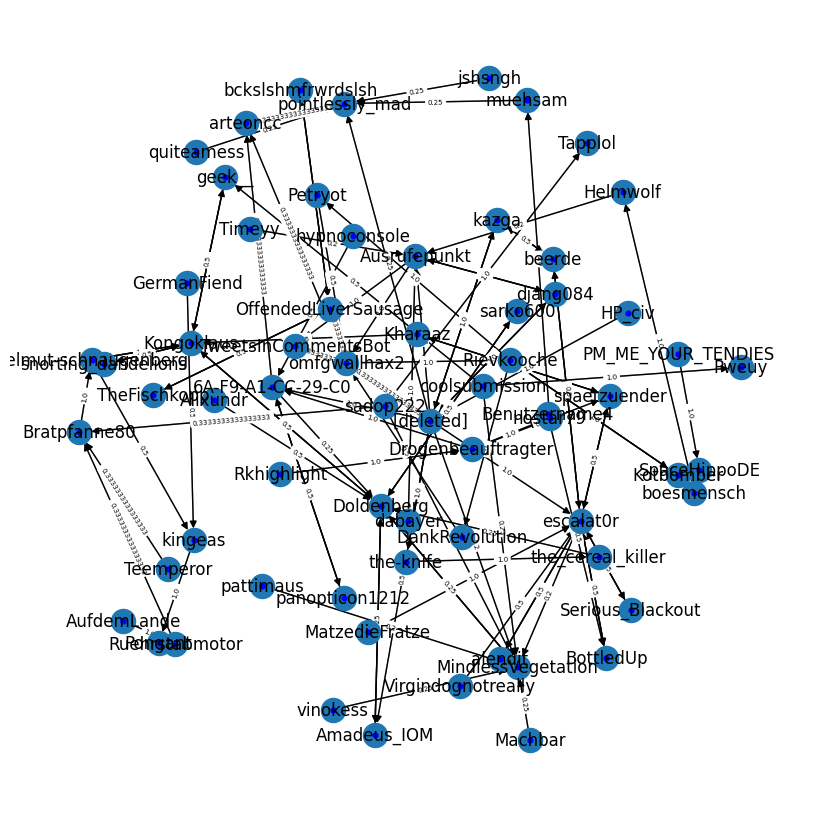

In [ ]:
from matplotlib.pyplot import text
plt.figure(figsize=(8, 8))
pos1 = nx.spring_layout(G_method2b, k=0.61)  # For better example looking
d1 = dict(G_method2b.degree)
labels1 = {e: G_method2b.edges[e]['edgeweight_method2b'] for e in G_method2b.edges}
nx.draw(G_method2b, pos1,with_labels=True)
nx.draw_networkx_edges(G_method2b, pos1, alpha=0.4)
nx.draw_networkx_nodes(G_method2b, pos1, node_size=12, node_color="b")
nx.draw_networkx_edge_labels(G_method2b, pos1, edge_labels=labels1, font_size = 5)
#nx.draw_networkx_labels(G_method2a, pos, labels=labels, font_size = 5)
plt.show()

In [ ]:
print(G_method2b.number_of_nodes()) #no.of nodes
print(G_method2b.number_of_edges()) #edges same as number of rows
print(np.mean([d for _, d in G_method2b.degree()])) #average degree of nodes
print(G_method2b.size(weight='edgeweight_method2b'))

66
102
3.090909090909091
64.75


In [ ]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb2b = n2v(G_method2b,dimensions=128)

mdl2b = g_emb2b.fit(
    vector_size = 128,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 95.12it/s]


In [ ]:
comment_id = 'SpaceHippoDE'
for s in mdl2b.wv.most_similar(comment_id, topn = 10):
    print(s)

('Drogenbeauftragter', 0.9971029758453369)
('muehsam', 0.9964649081230164)
('[deleted]', 0.996424674987793)
('Ruehrstabmotor', 0.9962425827980042)
('nostar79', 0.9962140321731567)
('Rkhighlight', 0.9960082769393921)
('the-knife', 0.9959202408790588)
('Benutzername4', 0.9957144260406494)
('Teemperor', 0.9957043528556824)
('PM_ME_YOUR_TENDIES', 0.9956833124160767)


---
Comparing both dataframes from method 2a and method 2b
---

.

In [ ]:
count_mismatch = 0
for ind1, row1 in data_method2a_final.iterrows():
  for ind2, row2 in data_method2b_final.iterrows():
    if row1['from_user'] == row2['from_user']:
     if row1['to_user'] == row2['to_user']:
      if row1['edgeweight_method2a'] != row2['edgeweight_method2b']:
        print(row1['from_user'])
        print(row1['to_user'])
        print(row1['edgeweight_method2a'])
        print(row2['from_user'])
        print(row2['to_user'])
        print(row2['edgeweight_method2b'])
        count_mismatch += 1
print(count_mismatch) #114 different weights found

0


0 means that both methods resulted in exactly the same weights